In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score


%matplotlib inline

sns.set_style("whitegrid")

In [2]:
#Loading the dataset

df = pd.read_csv("zomato.csv")

df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
#Checking basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## 1. Data Cleaning

In [4]:
#Checking for null values

df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
#Dropping unnecessary columns

df.drop(columns = ["url", "phone", "listed_in(city)", "menu_item", "dish_liked", "reviews_list"],
        inplace = True)

In [6]:
#Dropping missing values

df.dropna(inplace = True)

In [7]:
#Checking the amount of duplicates in the dataset

df.duplicated().sum()

12543

In [8]:
#Dropping duplicates

df.drop_duplicates(inplace = True)

In [9]:
#Renaming some columns

df.rename(columns = {"name": "rest_name",
                     "address": "address",
                     "rate": "rating",
                     "cuisines": "cuisine_type",
                     "listed_in(type)": "service_type",
                     "approx_cost(for two people)":"cost_for_two"},
          inplace = True)

In [10]:
#Reordering the columns in the dataset

df = df.reindex(columns = ["rest_name", "rest_type", "service_type", "cuisine_type", "cost_for_two",
                           "book_table","online_order","rating", "votes", "location", "address"])

In [11]:
df.head()

,rest_name,rest_type,service_type,cuisine_type,cost_for_two,book_table,online_order,rating,votes,location,address
0,Jalsa,Casual Dining,Buffet,"North Indian, Mughlai, Chinese",800,Yes,Yes,4.1/5,775,Banashankari,"942, 21st Main Road, 2nd Stage, Banashankari, ..."
1,Spice Elephant,Casual Dining,Buffet,"Chinese, North Indian, Thai",800,No,Yes,4.1/5,787,Banashankari,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ..."
2,San Churro Cafe,"Cafe, Casual Dining",Buffet,"Cafe, Mexican, Italian",800,No,Yes,3.8/5,918,Banashankari,"1112, Next to KIMS Medical College, 17th Cross..."
3,Addhuri Udupi Bhojana,Quick Bites,Buffet,"South Indian, North Indian",300,No,No,3.7/5,88,Banashankari,"1st Floor, Annakuteera, 3rd Stage, Banashankar..."
4,Grand Village,Casual Dining,Buffet,"North Indian, Rajasthani",600,No,No,3.8/5,166,Basavanagudi,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza..."


In [12]:
#Converting "Cost for two" to a numerical column

df["cost_for_two"] = df["cost_for_two"].apply(lambda x: x.replace(",", "."))

df["cost_for_two"] = df["cost_for_two"].astype(float)

In [13]:
#Removing last 2 characters from "rating" values

df["rating"] = df["rating"].str[:-2]

In [14]:
#Converting "rating" to a numerical column

df["rating"] = pd.to_numeric(df["rating"], errors = "coerce")

df.head()

,rest_name,rest_type,service_type,cuisine_type,cost_for_two,book_table,online_order,rating,votes,location,address
0,Jalsa,Casual Dining,Buffet,"North Indian, Mughlai, Chinese",800.0,Yes,Yes,4.1,775,Banashankari,"942, 21st Main Road, 2nd Stage, Banashankari, ..."
1,Spice Elephant,Casual Dining,Buffet,"Chinese, North Indian, Thai",800.0,No,Yes,4.1,787,Banashankari,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ..."
2,San Churro Cafe,"Cafe, Casual Dining",Buffet,"Cafe, Mexican, Italian",800.0,No,Yes,3.8,918,Banashankari,"1112, Next to KIMS Medical College, 17th Cross..."
3,Addhuri Udupi Bhojana,Quick Bites,Buffet,"South Indian, North Indian",300.0,No,No,3.7,88,Banashankari,"1st Floor, Annakuteera, 3rd Stage, Banashankar..."
4,Grand Village,Casual Dining,Buffet,"North Indian, Rajasthani",600.0,No,No,3.8,166,Basavanagudi,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza..."


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30990 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rest_name     30990 non-null  object 
 1   rest_type     30990 non-null  object 
 2   service_type  30990 non-null  object 
 3   cuisine_type  30990 non-null  object 
 4   cost_for_two  30990 non-null  float64
 5   book_table    30990 non-null  object 
 6   online_order  30990 non-null  object 
 7   rating        29661 non-null  float64
 8   votes         30990 non-null  int64  
 9   location      30990 non-null  object 
 10  address       30990 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 2.8+ MB


In [16]:
#Drop the remaining missing values

df.dropna(inplace = True)

## 2. Exploratoty Data Analysis

#### 2.1. What are the most common service types Bangalore restaurants offer?

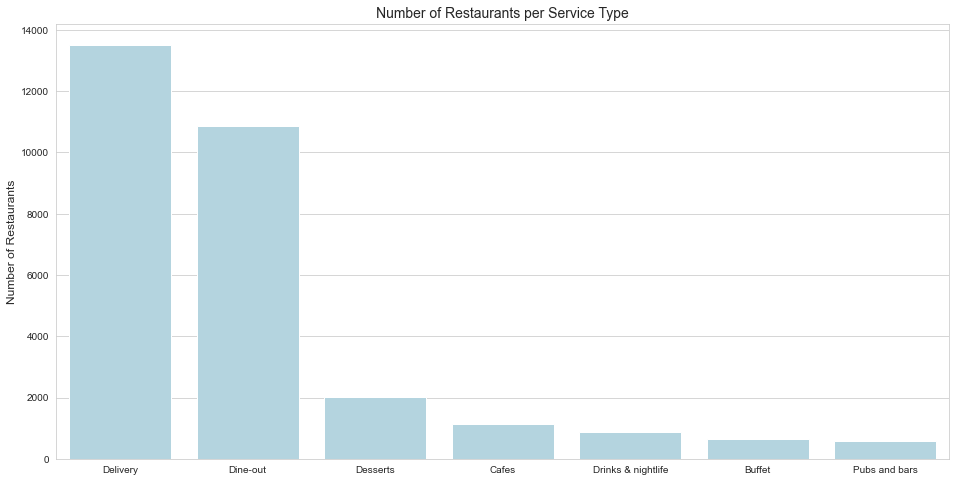

In [17]:
#Creating a DataFrame 

restaurant_servicetype = pd.DataFrame(df["service_type"].value_counts().sort_values(ascending = False).reset_index())

restaurant_servicetype.rename(columns = {"index": "Restaurant Service Type",
                                   "service_type": "Number of Restaurants"},
                       inplace = True)

#Visualizing the data

plt.figure(figsize = (16,8))

sns.barplot(data = restaurant_servicetype,
            x = "Restaurant Service Type",
            y = "Number of Restaurants",
            color = "lightblue")

plt.title("Number of Restaurants per Service Type", fontsize = 14)
plt.xlabel(None)
plt.ylabel("Number of Restaurants", fontsize = 12);

In [18]:
restaurant_servicetype

,Restaurant Service Type,Number of Restaurants
0,Delivery,13521
1,Dine-out,10871
2,Desserts,2032
3,Cafes,1137
4,Drinks & nightlife,877
5,Buffet,655
6,Pubs and bars,568


#### Answer:

* The vast majority of the Restaurants in Bangalore are Delivery or Dine-out Restaurants.

#### 2.2. What are the most popular restaurant types in Bangalore?


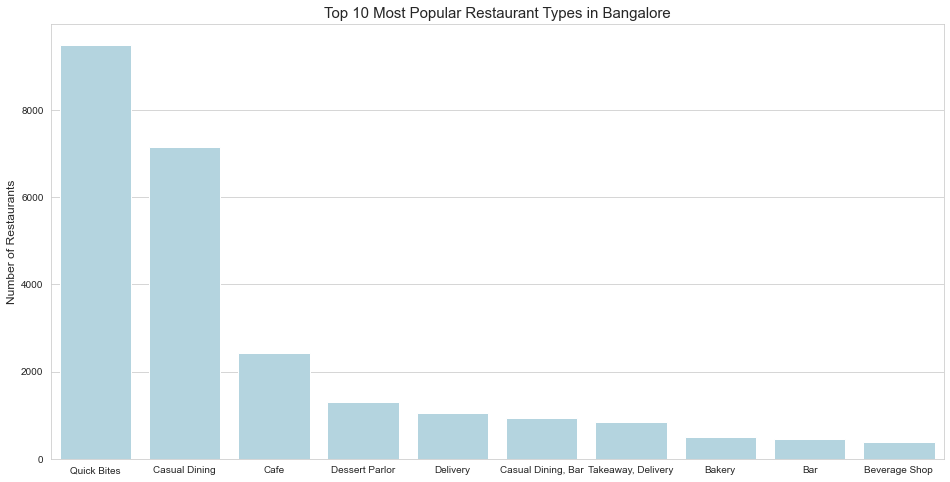

In [19]:
#Creating a DataFrame

restaurant_types = pd.DataFrame(df["rest_type"].value_counts()[:10].sort_values(ascending = False).reset_index())

restaurant_types.rename(columns = {"index": "Restaurant Type",
                                   "rest_type": "Number of Restaurants"},
                        inplace = True)

#Visualizing the data 

plt.figure(figsize = (16,8))

sns.barplot(data = restaurant_types,
            x = "Restaurant Type",
            y = "Number of Restaurants",
            color = "lightblue")

plt.title("Top 10 Most Popular Restaurant Types in Bangalore", fontsize = 15)
plt.xlabel(None)
plt.ylabel("Number of Restaurants", fontsize = 12);

#### Answer:

* The most popular Restaurant types in Bangalore are Quick Bites and Casual Dining Restaurants.

#### 2.3. What are the most popular cuisine types in Bangalore?

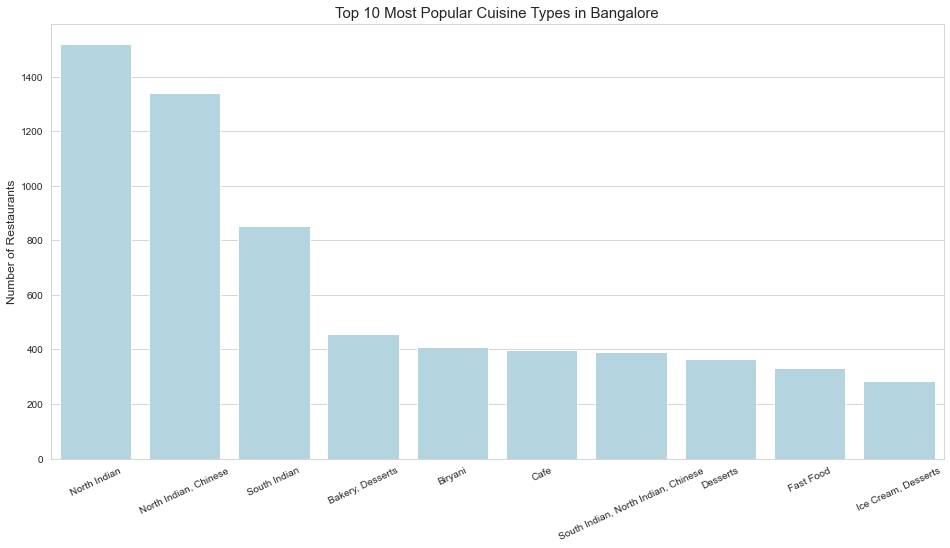

In [20]:
#Creating a DataFrame

cuisine_type = pd.DataFrame(df["cuisine_type"].value_counts()[:10].sort_values(ascending = False).reset_index())

cuisine_type.rename(columns = {"index": "Cuisine Type",
                                "cuisine_type": "Number of Restaurants"},
                     inplace = True)


#Visualizing the data

plt.figure(figsize = (16,8))

sns.barplot(data = cuisine_type,
            x = "Cuisine Type",
            y = "Number of Restaurants",
            color = "lightblue")

plt.title("Top 10 Most Popular Cuisine Types in Bangalore", fontsize = 15)
plt.xlabel(None)
plt.xticks(rotation = 25)
plt.ylabel("Number of Restaurants", fontsize = 12);

#### Answer:

* The most popular cuisine type in Bangalore is, by far, North Indian cuisine. Chinese and South Indian cuisine are also very popular.

#### 2.4. What are the most popular restaurant locations in Bangalore?

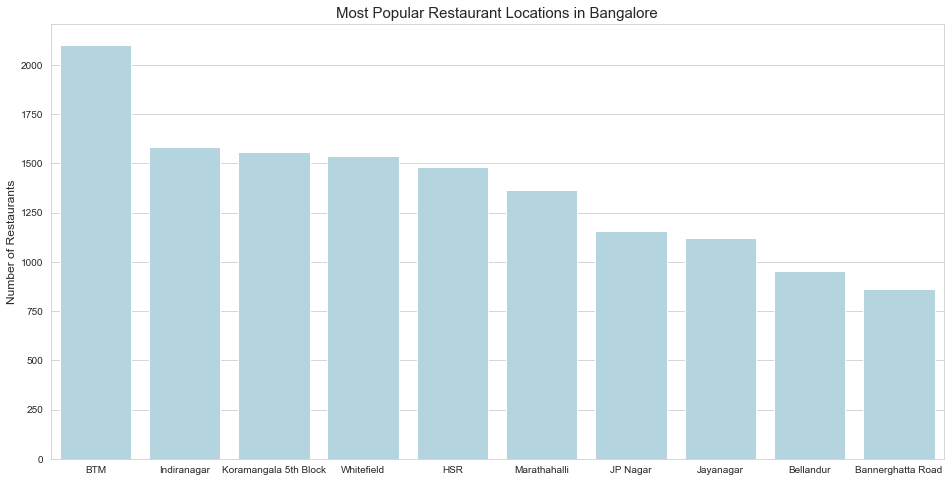

In [21]:
# Creating a DataFrame

common_location = pd.DataFrame(df["location"].value_counts()[:10].sort_values(ascending = False).reset_index())

common_location.rename(columns = {"index": "location",
                                 "location": "Number of Restaurants"},
                       inplace = True)

#Visualizing the data

plt.figure(figsize = (16,8))


sns.barplot(data = common_location,
            x = "location",
            y= "Number of Restaurants",
            color = "lightblue")

plt.title("Most Popular Restaurant Locations in Bangalore", fontsize = 15)
plt.xlabel(None)
plt.ylabel("Number of Restaurants", fontsize = 12);

#### Answer:

* BTM is the most popular Restaurant location in Bangalore.

#### 2.5.  What % of restaurants in Bangalore allow table bookings? And what % lets you order online?

In [22]:
#Creating a DataFrame

online_orders = pd.DataFrame(df["online_order"].value_counts().sort_values(ascending =  False) * 100 / df["online_order"].count()).reset_index()

online_orders.rename(columns = {"index": "Online Orders",
                                "online_order": "% of Restaurants"},
                     inplace = True)

online_orders

,Online Orders,% of Restaurants
0,Yes,64.819123
1,No,35.180877


In [23]:
df.head()

,rest_name,rest_type,service_type,cuisine_type,cost_for_two,book_table,online_order,rating,votes,location,address
0,Jalsa,Casual Dining,Buffet,"North Indian, Mughlai, Chinese",800.0,Yes,Yes,4.1,775,Banashankari,"942, 21st Main Road, 2nd Stage, Banashankari, ..."
1,Spice Elephant,Casual Dining,Buffet,"Chinese, North Indian, Thai",800.0,No,Yes,4.1,787,Banashankari,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ..."
2,San Churro Cafe,"Cafe, Casual Dining",Buffet,"Cafe, Mexican, Italian",800.0,No,Yes,3.8,918,Banashankari,"1112, Next to KIMS Medical College, 17th Cross..."
3,Addhuri Udupi Bhojana,Quick Bites,Buffet,"South Indian, North Indian",300.0,No,No,3.7,88,Banashankari,"1st Floor, Annakuteera, 3rd Stage, Banashankar..."
4,Grand Village,Casual Dining,Buffet,"North Indian, Rajasthani",600.0,No,No,3.8,166,Basavanagudi,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza..."


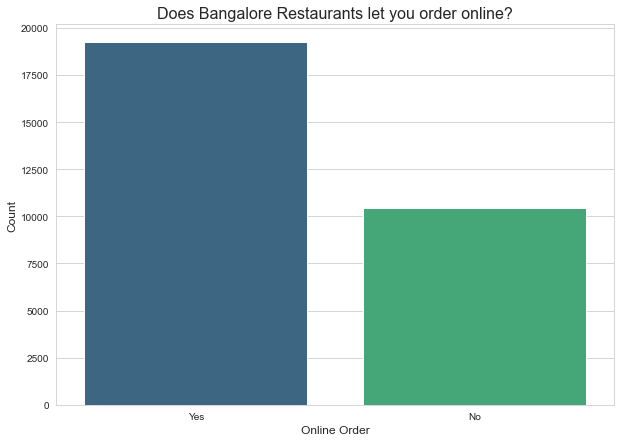

In [24]:
plt.figure(figsize = (10,7))

sns.countplot(data = df,
              x = df["online_order"],
              palette = "viridis")

plt.title("Does Bangalore Restaurants let you order online?", fontsize = 16)
plt.xlabel("Online Order", fontsize = 12)
plt.ylabel("Count", fontsize = 12);
              

In [25]:
#Creating a DataFrame

table_bookings = pd.DataFrame(df["book_table"].value_counts(ascending = True) * 100 / df["book_table"].count()).reset_index()

table_bookings.rename(columns = {"index": "Table Bookings",
                                 "book_table": "% of Restaurants"},
                      inplace = True)

table_bookings

,Table Bookings,% of Restaurants
0,Yes,17.919153
1,No,82.080847


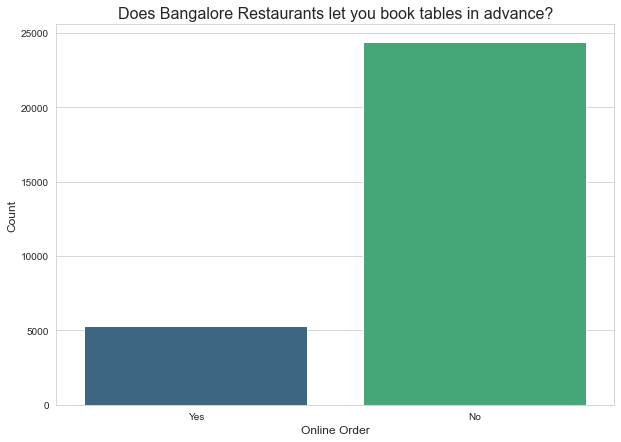

In [26]:
plt.figure(figsize = (10,7))

sns.countplot(data = df,
              x = df["book_table"],
              palette = "viridis")

plt.title("Does Bangalore Restaurants let you book tables in advance?", fontsize = 16)
plt.xlabel("Online Order", fontsize = 12)
plt.ylabel("Count", fontsize = 12);

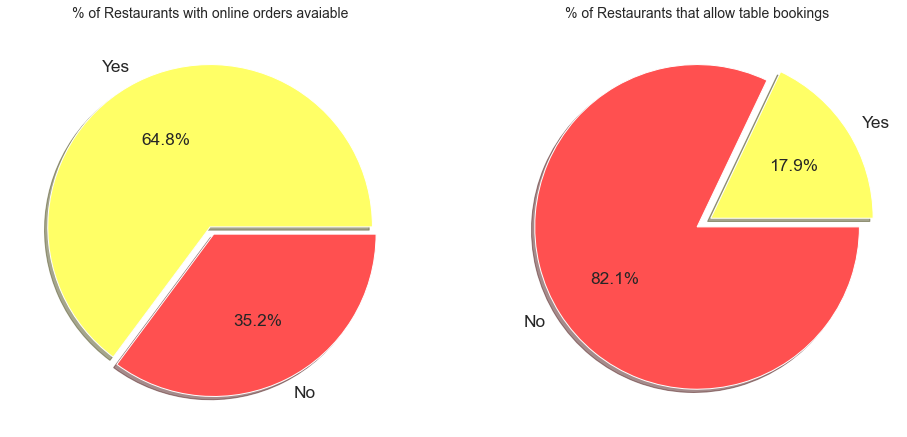

In [27]:
#Visualizing both "Online orders" and "Table Bookings" in a Piechart

fig, (ax1, ax2) = plt.subplots(figsize = (16,8),
                               nrows = 1, 
                               ncols = 2)

ax1.pie(online_orders["% of Restaurants"],
        autopct="%1.1f%%",
        labels = online_orders["Online Orders"].values,
        shadow = True,
        colors = ['#ffff66','#ff5050'],
        explode=(0, 0.05),
        textprops = {"size": "xx-large"})
ax1.set_title("% of Restaurants with online orders avaiable", fontsize = 14)


ax2.pie(table_bookings["% of Restaurants"],
        autopct="%1.1f%%",
        labels = table_bookings["Table Bookings"].values,
        shadow = True,
        colors = ['#ffff66','#ff5050'], 
        explode=(0.1, 0),
        textprops = {"size": "xx-large"})
ax2.set_title("% of Restaurants that allow table bookings", fontsize = 14);

#### Answer:

* 64% of the Bangalore Restaurants let you order online, while 36% don't. 
* On the flip side, only 17,4% of the Restaurants in Bangalore allow for table bookings, while the vast majority (82,6%) don't.

####  2.5. What are the most voted restaurants in Bangalore?

In [28]:
#Creating a DataFrame

most_voted = pd.DataFrame(df.groupby(by = "rest_name")["votes"].max().sort_values(ascending = False).reset_index())[:10]

most_voted.rename(columns = {"rest_name": "Restaurant Name",
                             "votes": "Number of Votes"},
                  inplace = True)

most_voted

,Restaurant Name,Number of Votes
0,Byg Brewski Brewing Company,16832
1,Toit,14956
2,Truffles,14726
3,AB's - Absolute Barbecues,12121
4,The Black Pearl,10550
5,Big Pitcher,9300
6,Onesta,9085
7,Arbor Brewing Company,8419
8,Empire Restaurant,8304
9,Prost Brew Pub,7871


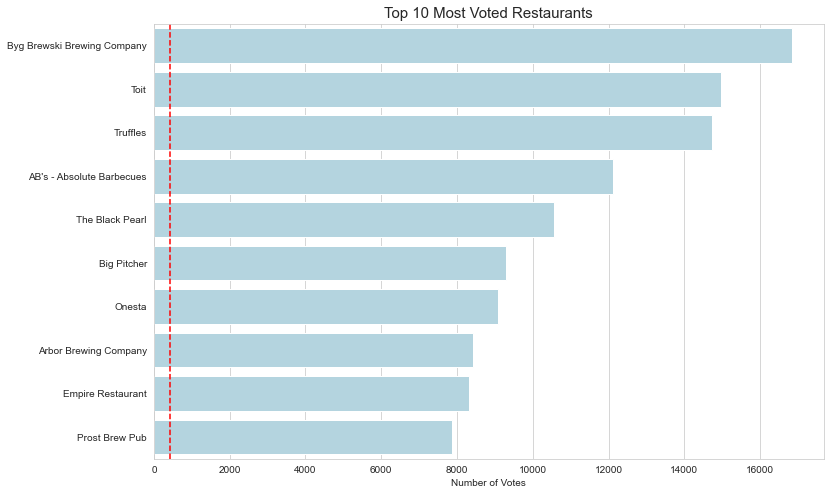

In [29]:
#Visualizing the data

plt.figure(figsize = (12,8))

sns.barplot(data = most_voted,
            x = "Number of Votes", 
            y = "Restaurant Name",
            color = "lightblue")

plt.title("Top 10 Most Voted Restaurants", fontsize = 15)
mostvoted_meanline = plt.axvline(df["votes"].mean(), ls = "--", color = "red")
plt.ylabel(None);

#### Answer:

* Byg Brewski Brewing Company, Toit, Truffles and Absolute Barbecues are the most voted Restaurants in Bangalore, regarding Zomato platform. Every single restaurant mencioned has more than 12000 votes on Zomato.

#### 2.6. What is the rating distribution for the restaurants in Bangalore?

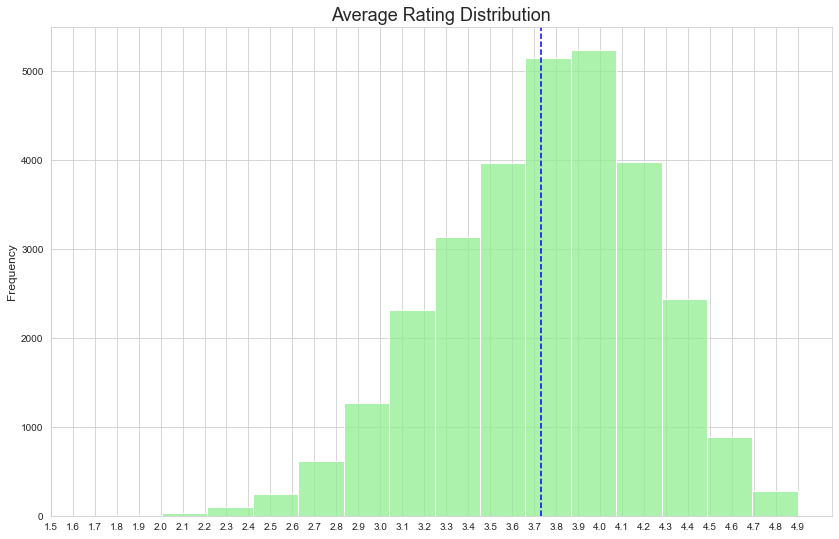

In [30]:
#Creating an histogram with the average rating distribution

plt.figure(figsize = (14,9))

sns.histplot(data = df["rating"],
             bins = 15,
             color = "lightgreen")

plt.title("Average Rating Distribution", fontsize = 18)
plt.xticks(np.arange(1.5,5,0.1))
plt.axvline(df["rating"].mean(), ls = "--", color = "blue")
plt.xlabel(None)
plt.ylabel("Frequency", fontsize = 12);

#### Answer:

* The vast majority of the ratings given by reviewers range between 3.3 and 4.3 (on a scale of 1-5).



* There are very few reviews below 3.0 rating and above 4.7.

#### 2.7. What are the highest rated restaurants in Bangalore (by average rating)?

In [31]:
#Creating a DataFrame

highest_rated = pd.DataFrame(df.groupby(by = "rest_name")["rating"].max().sort_values(ascending = False)[:10]).reset_index()

highest_rated.rename(columns = {"rest_name": "Restaurant Name",
                                "rating": "Rating"},
                     inplace = True)

highest_rated.replace('SantÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Spa Cuisine',
                      "Spa Cuisine",   inplace = True)


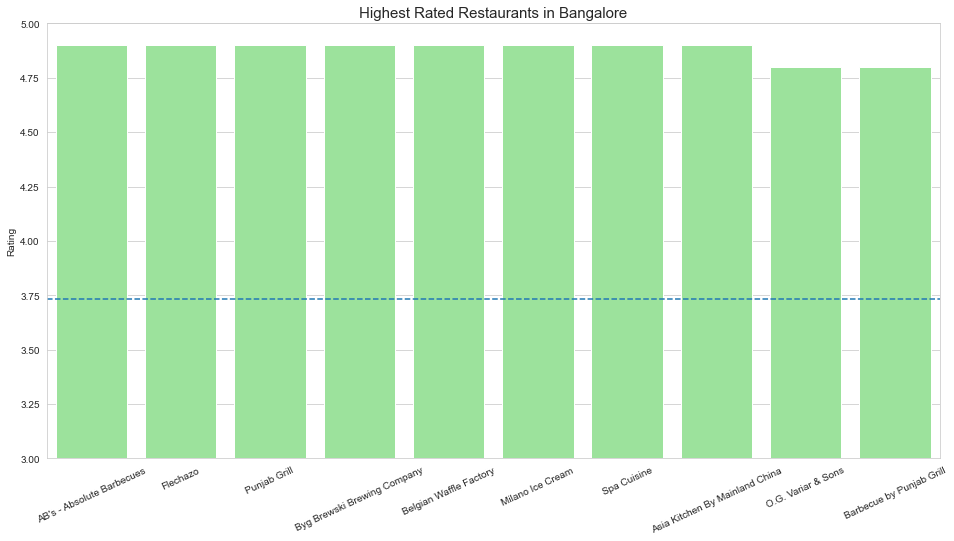

In [32]:
#Visualizing the data

plt.figure(figsize = (16,8))

sns.barplot(data = highest_rated,
            x = "Restaurant Name",
            y = "Rating",
            color = "lightgreen")

plt.title("Highest Rated Restaurants in Bangalore", fontsize = 15)
plt.xticks(rotation = 25)
plt.xlabel(None)
plt.axhline(df["rating"].mean(),
            ls = "--")
plt.ylim(3,5);

#### Answer:

* There are 8 restaurants in Bangalore that have an average rating of 4.9 (near the maximum rating of 5) in Zomato platform.

#### 2.8. What is the approximate cost (for two people) in Bangalore restaurants?

In [33]:
#Cheapest Restaurant

df["cost_for_two"].min()

1.0

In [34]:
#Most Expensive Restaurant

df["cost_for_two"].max()

950.0

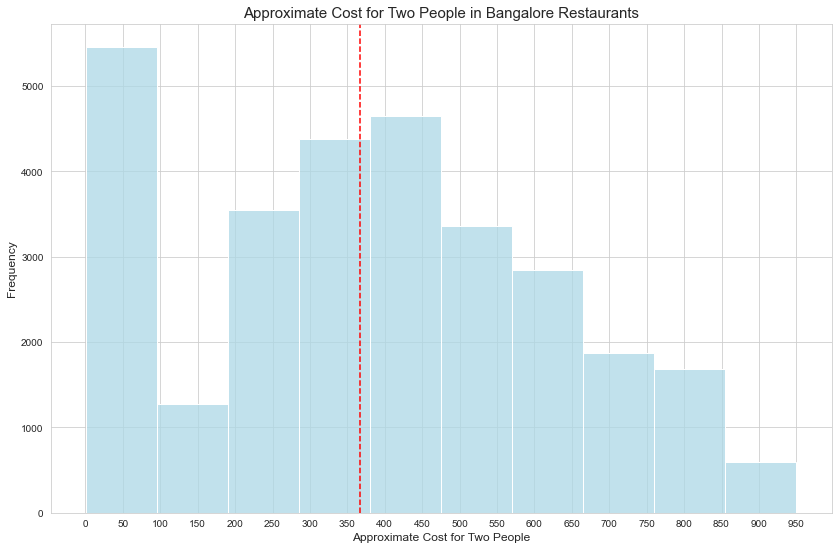

In [35]:
#Creating an histogram with the approximate cost distribution

plt.figure(figsize = (14,9))

sns.histplot(df["cost_for_two"],
             bins = 10,
             color = "lightblue")

plt.title("Approximate Cost for Two People in Bangalore Restaurants", fontsize = 15)
plt.xticks(np.arange(0,1000,50))
plt.axvline(df["cost_for_two"].mean(), ls = "--", color = "red")
plt.xlabel("Approximate Cost for Two People", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12);

#### Answer:

* The average cost for Bangalore restaurants varies by a considerable margin.



* There are a lot of restaurants that are very cheap (below 150 rupees per person) and also a lot on a mid-range price-point.



* However, there are also a considerable amount of quite expensive ones (over 300 rupees per person).

#### 2.9. What are the most expensive restaurants in Bangalore?

In [36]:
#Creating a DataFrame

most_expensive = df.groupby(by = "rest_name")["cost_for_two"].max().sort_values(ascending = False).reset_index()[:10]

most_expensive

,rest_name,cost_for_two
0,Engine,950.0
1,The Onyx - The HHI Select Bengaluru,950.0
2,Inchara,950.0
3,Bathinda Dine,950.0
4,1947,950.0
5,Ayda Persian Kitchen,950.0
6,Caffe Pascucci,950.0
7,Hotel Ivy Dew Drops,900.0
8,Basmati Restaurant,900.0
9,Breezes - Hotel Pigeon International,900.0


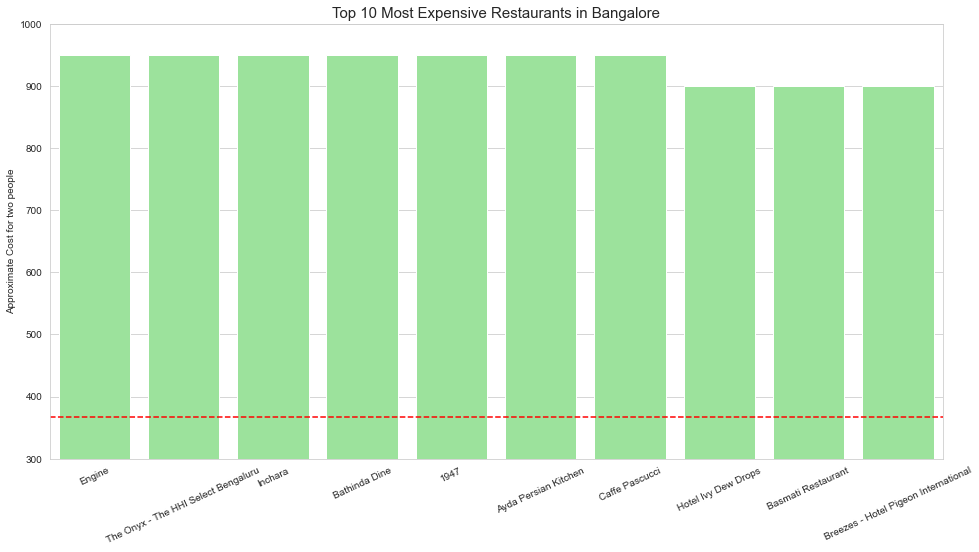

In [37]:
#Visualizing the data

plt.figure(figsize = (16,8))

sns.barplot(data = most_expensive,
            x = "rest_name",
            y = "cost_for_two",
            color = "lightgreen")

plt.title("Top 10 Most Expensive Restaurants in Bangalore", fontsize = 15)
plt.xticks(rotation = 25)
plt.ylim(300,1000)
plt.axhline(df["cost_for_two"].mean(), ls = "--", color = "red")
plt.xlabel(None)
plt.ylabel("Approximate Cost for two people");

#### Answer:

* There are 8 restaurants that charge approximately 950 rupees for two persons, making them the top 8 most expensive restaurants in Bangalore.

## 3. Data Preprocessing

In [38]:
#Converting strings to pandas categories

for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()


In [39]:
#Checking for columns that aren't integers or floats

for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

rest_name
rest_type
service_type
cuisine_type
book_table
online_order
location
address


In [40]:
#Converting cateogrical variables into numbers

for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes+1

## 4. Correlation Matrix

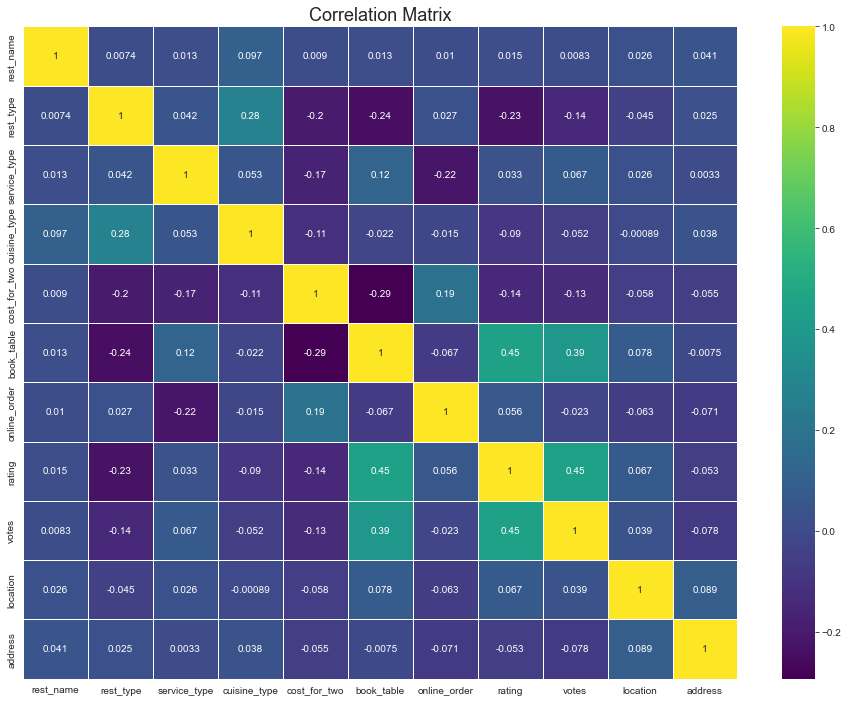

In [41]:
#Checking the correlation between variables with a Correlation Matrix

plt.figure(figsize = (16,12))

sns.heatmap(df.corr(),
            annot = True,
            cmap = "viridis",
            linewidths = 1,
            linecolor = "white")

plt.title("Correlation Matrix", fontsize = 18);

In [42]:
#Printing the correlation between the target variable (rating) and the others

rating_corr = df.corr()["rating"].sort_values(ascending = False)

rating_corr

rating          1.000000
votes           0.449234
book_table      0.446348
location        0.067297
online_order    0.056148
service_type    0.033442
rest_name       0.014660
address        -0.052582
cuisine_type   -0.090043
cost_for_two   -0.144843
rest_type      -0.230524
Name: rating, dtype: float64

#### Correlation matrix insights:

* There isn't a lot of correlation between variables, since the strongest correlation we can find between two variable is 0.45



* The target variable (rating) is positively correlated to some level with the ability to book tables and the number of votes for the given restaurant.

## 5. Modelling

In [43]:
df.head()

,rest_name,rest_type,service_type,cuisine_type,cost_for_two,book_table,online_order,rating,votes,location,address
0,2778,25,1,1895,800.0,2,2,4.1,775,2,6264
1,5273,25,1,817,800.0,1,2,4.1,787,2,3005
2,4883,20,1,654,800.0,1,2,3.8,918,2,615
3,140,74,1,2222,300.0,1,1,3.7,88,2,1965
4,2248,25,1,1922,600.0,1,1,3.8,166,5,275


In [44]:
#Creating X (features) & Y(target-variable)

X = df.drop(columns = "rating")

y = df["rating"]

In [45]:
#Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 45)

### 5.1. Linear Regression Model

In [46]:
#Instantiate the model

lr = LinearRegression()

#Fit the model into the data

lr.fit(X_train, y_train)

#Making predictions

lr_preds = lr.predict(X_test)


In [47]:
#Comparing Linear Regression predictions with true values

lr_error = pd.DataFrame({"Real Values": np.array(y_test).flatten(), 
                         "Predicted Values": lr_preds.flatten()})
lr_error.head(20)


,Real Values,Predicted Values
0,3.5,3.588545
1,3.1,3.659482
2,3.7,3.592631
3,3.7,3.528897
4,4.7,5.173242
5,2.9,3.607780
6,4.1,3.612485
7,3.5,3.544641
8,3.5,3.446283
9,2.9,3.591258


In [48]:
#Evaluating the Linear Regression Model

print("Linear Regression Model")
print("Mean Absolute error:", round(mean_absolute_error(y_test, lr_preds),2))

print("Mean Squared error:", round(mean_squared_error(y_test, lr_preds),2))

print("Root Mean Squared error:", round(np.sqrt(mean_squared_error(y_test, lr_preds)),2))

print("R2 Score:", round(r2_score(y_test, lr_preds),2))


Linear Regression Model
Mean Absolute error: 0.29
Mean Squared error: 0.14
Root Mean Squared error: 0.38
R2 Score: 0.31


### 5.2 Decision Tree Regressor

In [49]:
#Instantiate the model

dtr = DecisionTreeRegressor()

#Fit the model into the data

dtr.fit(X_train, y_train)

#Making predictions

dtr_preds = dtr.predict(X_test)


In [50]:
#Comparing Decision Tree Regressor predictions with true values

dtr_error = pd.DataFrame({"Real Values": np.array(y_test).flatten(), 
                         "Predicted Values": dtr_preds.flatten()})
dtr_error.head(20)

,Real Values,Predicted Values
0,3.5,3.50
1,3.1,3.40
2,3.7,3.75
3,3.7,3.50
4,4.7,4.70
5,2.9,2.90
6,4.1,4.10
7,3.5,3.10
8,3.5,3.10
9,2.9,2.90


In [51]:
#Evaluating the Decision Tree Regressor Model

print("Decision Tree Regressor Model")
print("Mean Absolute error:", round(mean_absolute_error(y_test, dtr_preds),2))

print("Mean Squared error:", round(mean_squared_error(y_test, dtr_preds),2))

print("Root Mean Squared error:", round(np.sqrt(mean_squared_error(y_test, dtr_preds)),2))

print("R2 Score:", round(r2_score(y_test, dtr_preds),2))


Decision Tree Regressor Model
Mean Absolute error: 0.05
Mean Squared error: 0.03
Root Mean Squared error: 0.17
R2 Score: 0.85


### 5.3 Lasso Regression



In [52]:
#Instantiate the model

lasso = linear_model.Lasso()

#Fit the model into the data

lasso.fit(X_train, y_train)

#Making predictions

lasso_preds = lasso.predict(X_test)


In [53]:
#Comparing Lasso Regression predictions with true values

lasso_error = pd.DataFrame({"Real Values": np.array(y_test).flatten(), 
                         "Predicted Values": lasso_preds.flatten()})
lasso_error.head(20)

,Real Values,Predicted Values
0,3.5,3.636582
1,3.1,3.682216
2,3.7,3.610689
3,3.7,3.558697
4,4.7,5.406066
5,2.9,3.597609
6,4.1,3.658552
7,3.5,3.639644
8,3.5,3.542527
9,2.9,3.631856


In [54]:
#Evaluating the Lasso Regression Model

print("Lasso Regression Model")
print("Mean Absolute error:", round(mean_absolute_error(y_test, lasso_preds),2))

print("Mean Squared error:", round(mean_squared_error(y_test, lasso_preds),2))

print("Root Mean Squared error:", round(np.sqrt(mean_squared_error(y_test, lasso_preds)),2))

print("R2 Score:", round(r2_score(y_test, lasso_preds),2))


Lasso Regression Model
Mean Absolute error: 0.31
Mean Squared error: 0.16
Root Mean Squared error: 0.4
R2 Score: 0.22


### 5.4 Support Vector Regressor

In [55]:
#Instantiate the model

svr = SVR()

#Fit the model into the data

svr.fit(X_train, y_train)

#Making predictions

svr_preds = svr.predict(X_test)


In [56]:
#Comparing Support Vector Regressor predictions with true values

svr_error = pd.DataFrame({"Real Values": np.array(y_test).flatten(), 
                         "Predicted Values": svr_preds.flatten()})

svr_error.head(20)

,Real Values,Predicted Values
0,3.5,3.597249
1,3.1,3.678379
2,3.7,3.629199
3,3.7,3.521739
4,4.7,4.600434
5,2.9,3.539020
6,4.1,3.797045
7,3.5,3.536794
8,3.5,3.537175
9,2.9,3.532038


In [57]:
#Evaluating the Support Vector Regressor Model

print("Support Vector Regressor Model")
print("Mean Absolute error:", round(mean_absolute_error(y_test, svr_preds),2))

print("Mean Squared error:", round(mean_squared_error(y_test, svr_preds),2))

print("Root Mean Squared error:", round(np.sqrt(mean_squared_error(y_test, svr_preds)),2))

print("R2 Score:", round(r2_score(y_test, svr_preds),2))


Support Vector Regressor Model
Mean Absolute error: 0.27
Mean Squared error: 0.13
Root Mean Squared error: 0.35
R2 Score: 0.39


### 5.5 Random Forest Regressor

In [58]:
#Instantiate the model

rfr = RandomForestRegressor()

#Fit the model into the data

rfr.fit(X_train, y_train)

#Making predictions

rfr_preds = rfr.predict(X_test)


In [59]:
#Comparing Random Forest Regressor predictions with true values

rfr_error = pd.DataFrame({"Real Values": np.array(y_test).flatten(), 
                         "Predicted Values": rfr_preds.flatten()})

rfr_error.head(20)

,Real Values,Predicted Values
0,3.5,3.503000
1,3.1,3.370000
2,3.7,3.739661
3,3.7,3.448500
4,4.7,4.684000
5,2.9,3.055000
6,4.1,4.099000
7,3.5,3.405333
8,3.5,3.451733
9,2.9,3.101000


In [60]:
#Evaluating the Support Vector Regressor Model

print("Random Forest Regressor Model")
print("Mean Absolute error:", round(mean_absolute_error(y_test, rfr_preds),2))

print("Mean Squared error:", round(mean_squared_error(y_test, rfr_preds),2))

print("Root Mean Squared error:", round(np.sqrt(mean_squared_error(y_test, rfr_preds)),2))

print("R2 Score:", round(r2_score(y_test, rfr_preds),2))


Random Forest Regressor Model
Mean Absolute error: 0.07
Mean Squared error: 0.02
Root Mean Squared error: 0.14
R2 Score: 0.91


# End